<a href="https://colab.research.google.com/github/jeppa1/Dados_Enem_Por_Escola/blob/main/Enem_Por_Escola_Para_Analise_De_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade gspread gspread-dataframe pandas numpy matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 61.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2


In [1]:
# Etapa 2 - Autenticar usuário no Google Sheets
from google.colab import auth
auth.authenticate_user()

# Etapa 3 - Importar bibliotecas necessárias
import gspread
import pandas as pd
from gspread_dataframe import set_with_dataframe

# Etapa 4 - Conectar à planilha do Google Sheets
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

print("✅ Bibliotecas carregadas e autenticação feita com sucesso!")

✅ Bibliotecas carregadas e autenticação feita com sucesso!


In [3]:
# Etapa 5 - Abrir sua planilha
sheet_id = '1rjkFx6v_W_VkcUrylzPWII-xR24xbSS37duqA9iYsb0'  # <<< Substitua pelo ID da sua planilha
sh = gc.open_by_key(sheet_id)

# Etapa 6 - Carregar a aba "Dados_Enem_Por_Escola"
worksheet = sh.worksheet('MICRODADOS_ENEM_ESCOLA')
dados = worksheet.get_all_values()

# Converter para DataFrame
df = pd.DataFrame(dados[1:], columns=dados[0])

print("Primeiras linhas carregadas:")
print(df.head())

Primeiras linhas carregadas:
  NU_ANO CO_UF_ESCOLA SG_UF_ESCOLA CO_MUNICIPIO_ESCOLA NO_MUNICIPIO_ESCOLA  \
0   2007           11           RO             1100205         Porto Velho   
1   2006           11           RO             1100205         Porto Velho   
2   2005           11           RO             1100205         Porto Velho   
3   2008           11           RO             1100205         Porto Velho   
4   2007           11           RO             1100205         Porto Velho   

  CO_ESCOLA_EDUCACENSO       NO_ESCOLA_EDUCACENSO TP_DEPENDENCIA_ADM_ESCOLA  \
0             11000058  CENTRO DE ENSINO CLASSE A                         4   
1             11000058  CENTRO DE ENSINO CLASSE A                         4   
2             11000058  CENTRO DE ENSINO CLASSE A                         4   
3             11000058  CENTRO DE ENSINO CLASSE A                         4   
4             11000171  CENTRO EDUCACIONAL MOJUCA                         4   

  TP_LOCALIZACAO_ESCOLA NU_

In [5]:
# Célula 3 - Carregar dados da aba "MICRODADOS_ENEM_ESCOLA" com segurança

from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import set_with_dataframe

print("✅ Autenticação feita com sucesso!")

# Abrir planilha pelo ID
sheet_id = '1rjkFx6v_W_VkcUrylzPWII-xR24xbSS37duqA9iYsb0'  # <<< Seu ID
sh = gc.open_by_key(sheet_id)

# Carregar aba "MICRODADOS_ENEM_ESCOLA"
worksheet = sh.worksheet('MICRODADOS_ENEM_ESCOLA')
dados = worksheet.get_all_values()

# Converter para DataFrame pandas
df_bruto = pd.DataFrame(dados[1:], columns=dados[0])

print("\n📌 Primeiras linhas carregadas:")
print(df_bruto.head())

✅ Autenticação feita com sucesso!

📌 Primeiras linhas carregadas:
  NU_ANO CO_UF_ESCOLA SG_UF_ESCOLA CO_MUNICIPIO_ESCOLA NO_MUNICIPIO_ESCOLA  \
0   2007           11           RO             1100205         Porto Velho   
1   2006           11           RO             1100205         Porto Velho   
2   2005           11           RO             1100205         Porto Velho   
3   2008           11           RO             1100205         Porto Velho   
4   2007           11           RO             1100205         Porto Velho   

  CO_ESCOLA_EDUCACENSO       NO_ESCOLA_EDUCACENSO TP_DEPENDENCIA_ADM_ESCOLA  \
0             11000058  CENTRO DE ENSINO CLASSE A                         4   
1             11000058  CENTRO DE ENSINO CLASSE A                         4   
2             11000058  CENTRO DE ENSINO CLASSE A                         4   
3             11000058  CENTRO DE ENSINO CLASSE A                         4   
4             11000171  CENTRO EDUCACIONAL MOJUCA                     

In [6]:
# Célula 4 - Reestruturação do DataFrame com base no Slide 2 - páginas 27-30

# Mapeamento das colunas originais para Q1, Q2, Q3... conforme escopo técnico
colunas_para_codigo = {
    'NU_ANO': 'Q1',
    'CO_UF_ESCOLA': 'Q2',
    'SG_UF_ESCOLA': 'Q3',
    'CO_MUNICIPIO_ESCOLA': 'Q4',
    'NO_MUNICIPIO_ESCOLA': 'Q5',
    'CO_ESCOLA_EDUCACENSO': 'Q6',
    'NO_ESCOLA_EDUCACENSO': 'Q7',
    'TP_DEPENDENCIA_ADM_ESCOLA': 'Q8',
    'TP_LOCALIZACAO_ESCOLA': 'Q9',
    'PORTE_ESCOLA': 'Q10',
    'NU_MATRICULAS': 'Q11',
    'NU_MEDIA_CN': 'Q12',
    'NU_MEDIA_CH': 'Q13',
    'NU_MEDIA_LP': 'Q14',
    'NU_MEDIA_MT': 'Q15',
    'NU_MEDIA_RED': 'Q16',
    'NU_MEDIA_OBJ': 'Q17',
    'NU_MEDIA_TOT': 'Q18',
    'INSE': 'Q19',
    'PC_FORMACAO_DOCENTE': 'Q20',
    'NU_TAXA_PERMANENCIA': 'Q21',
    'NU_TAXA_APROVACAO': 'Q22',
    'NU_TAXA_REPROVACAO': 'Q23',
    'NU_TAXA_ABANDONO': 'Q24'
}

# Renomear colunas com base no dicionário acima
df_renomeado = df_bruto.rename(columns=colunas_para_codigo, errors='ignore')

# Inserir ID sequencial se não existir
if 'ID' not in df_renomeado.columns:
    df_renomeado.insert(0, 'ID', range(1, len(df_renomeado)+1))

# Selecionar apenas colunas reestruturadas (Q1 a Q24)
colunas_selecionadas = ['ID'] + [f'Q{i}' for i in range(1, 25)]
df_estruturado = df_renomeado[[col for col in colunas_selecionadas if col in df_renomeado.columns]]

print("\n✅ Novo DataFrame estruturado criado com sucesso!")
print(df_estruturado.head())
print("\n🧾 Colunas atuais:", df_estruturado.columns.tolist())


✅ Novo DataFrame estruturado criado com sucesso!
   ID    Q1  Q2  Q3       Q4           Q5        Q6  \
0   1  2007  11  RO  1100205  Porto Velho  11000058   
1   2  2006  11  RO  1100205  Porto Velho  11000058   
2   3  2005  11  RO  1100205  Porto Velho  11000058   
3   4  2008  11  RO  1100205  Porto Velho  11000058   
4   5  2007  11  RO  1100205  Porto Velho  11000171   

                          Q7 Q8 Q9  ... Q15    Q16    Q17    Q18 Q19 Q20 Q21  \
0  CENTRO DE ENSINO CLASSE A  4  1  ...                    69.03               
1  CENTRO DE ENSINO CLASSE A  4  1  ...                    57.82               
2  CENTRO DE ENSINO CLASSE A  4  1  ...                    64.83               
3  CENTRO DE ENSINO CLASSE A  4  1  ...      72.16  60.02                      
4  CENTRO EDUCACIONAL MOJUCA  4  1  ...                    58.84               

     Q22    Q23   Q24  
0  91.90   8.10  0.00  
1                      
2  86.50  12.40  1.10  
3  90.30   9.70  0.00  
4  74.20  21.00  4

In [8]:
# Célula 5 - Carregar dados da aba "Dicionario"
worksheet_dicionario = sh.worksheet("Dicionario")
dados_dicionario = worksheet_dicionario.get_all_values()

# Converter para DataFrame pandas
df_dicionario = pd.DataFrame(dados_dicionario[1:], columns=dados_dicionario[0])

print("📌 Primeiras linhas do dicionário carregado:")
print(df_dicionario.head())

📌 Primeiras linhas do dicionário carregado:
  Microdados ENEM por Escolas - 2005 a 2015                \
0                                                           
1                                                Variável   
2                                         1        NU_ANO   
3                           DADOS DA ESCOLA                 
4                                         2  CO_UF_ESCOLA   

                                                         \
0                                                         
1                      Descrição da Variável  Categoria   
2           Ano da edição do ENEM por Escola              
3                                                         
4  Código da Unidade da Federação da escola.              

                                   
0                                  
1  Edição que contém a informação  
2                                  
3                                  
4                                  


In [9]:
# Célula 6 - Reestruturar o dicionário do INEP para formato técnico

# Renomear colunas para facilitar manipulação
df_dicionario.columns = ['Codigo', 'Variavel', 'Descricao', 'Categoria', 'Edicao']

# Filtrar apenas linhas com dados válidos (onde há código numérico)
df_dicionario = df_dicionario[df_dicionario['Codigo'].str.contains(r'^\d+$', na=True)]

# Converter Código para tipo int
df_dicionario['Codigo'] = df_dicionario['Codigo'].astype(int)

# Renomear colunas para seguir o padrão técnico
df_dicionario['Codigo'] = 'Q' + df_dicionario['Codigo'].astype(str)
df_dicionario['Nome_Variavel_Tecnico'] = df_dicionario['Variavel']
df_dicionario['Descricao_Tecnica'] = df_dicionario['Descricao']
df_dicionario['Categoria'] = df_dicionario['Categoria'].fillna('')

print("🧾 Primeiras linhas após reestruturação:")
print(df_dicionario[['Codigo', 'Nome_Variavel_Tecnico', 'Descricao_Tecnica', 'Categoria']].head(10))

🧾 Primeiras linhas após reestruturação:
   Codigo      Nome_Variavel_Tecnico  \
2      Q1                     NU_ANO   
4      Q2               CO_UF_ESCOLA   
5      Q3               SG_UF_ESCOLA   
6      Q4        CO_MUNICIPIO_ESCOLA   
7      Q5        NO_MUNICIPIO_ESCOLA   
8      Q6       CO_ESCOLA_EDUCACENSO   
9      Q7       NO_ESCOLA_EDUCACENSO   
10     Q8  TP_DEPENDENCIA_ADM_ESCOLA   
11     Q9      TP_LOCALIZACAO_ESCOLA   
13    Q10              NU_MATRICULAS   

                                    Descricao_Tecnica  \
2                    Ano da edição do ENEM por Escola   
4           Código da Unidade da Federação da escola.   
5            Sigla da Unidade da Federação da escola.   
6                      Código do município da escola.   
7                        Nome do município da escola.   
8   Código da Escola. Número gerado como identific...   
9       Nome da Escola no Educacenso do ano anterior.   
10  Tipo da dependência administrativa da entidade...   
11    

<ipython-input-9-2281002274>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dicionario['Codigo'] = df_dicionario['Codigo'].astype(int)
<ipython-input-9-2281002274>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dicionario['Codigo'] = 'Q' + df_dicionario['Codigo'].astype(str)
<ipython-input-9-2281002274>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [10]:
# Célula 7 - Corrigir SettingWithCopyWarning e finalizar metadados

# Criar cópia explícita do df_dicionario para evitar avisos
df_dicionario = df_dicionario.copy()

# Garantir tipos corretos
df_dicionario['Codigo'] = 'Q' + df_dicionario['Codigo'].astype(int).astype(str)
df_dicionario['Nome_Variavel_Tecnico'] = df_dicionario['Variavel']
df_dicionario['Descricao_Tecnica'] = df_dicionario['Descricao']
df_dicionario['Categoria'] = df_dicionario['Categoria'].fillna('')

# Classificar tipo da variável (Qualitativa/Quantitativa)
def classificar_tipo(var):
    if var in ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7']:
        return 'Qualitativa Nominal'
    elif var in ['Q8', 'Q9', 'Q10']:
        return 'Qualitativa Ordinal'
    else:
        return 'Quantitativa Contínua'

df_dicionario['Tipo'] = df_dicionario['Codigo'].apply(classificar_tipo)

# Selecionar colunas relevantes
df_metadados_final = df_dicionario[[
    'Codigo',
    'Nome_Variavel_Tecnico',
    'Descricao_Tecnica',
    'Categoria',
    'Tipo'
]]

print("\n🧾 Metadados técnicos finais:")
print(df_metadados_final.head(12))

ValueError: invalid literal for int() with base 10: 'Q1'

In [11]:
# Célula 8 - Carregar dicionário técnico da aba "Dicionario" e reestruturar os códigos para Q1, Q2, Q3...

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default

# Conectar ao Google Sheets com as novas credenciais
creds, _ = default()
gc = gspread.authorize(creds)

# Abrir planilha pelo ID (substitua pelo seu link real)
planilha_url = "https://docs.google.com/spreadsheets/d/1rjkFx6v_W_VkcUrylzPWII-xR24xbSS37duqA9iYsb0"   # <<< Substitua pelo seu link real
sh = gc.open_by_url(planilha_url)

# Carregar a aba "Dicionario"
worksheet_dicionario = sh.worksheet("Dicionario")
dados_dicionario = worksheet_dicionario.get_all_values()

# Converter para DataFrame pandas
df_dicionario = pd.DataFrame(dados_dicionario[1:], columns=dados_dicionario[0])

print("📌 Primeiras linhas do dicionário carregado:")
print(df_dicionario.head(10))

📌 Primeiras linhas do dicionário carregado:
  Microdados ENEM por Escolas - 2005 a 2015                        \
0                                                                   
1                                                        Variável   
2                                         1                NU_ANO   
3                           DADOS DA ESCOLA                         
4                                         2          CO_UF_ESCOLA   
5                                         3          SG_UF_ESCOLA   
6                                         4   CO_MUNICIPIO_ESCOLA   
7                                         5   NO_MUNICIPIO_ESCOLA   
8                                         6  CO_ESCOLA_EDUCACENSO   
9                                         7  NO_ESCOLA_EDUCACENSO   

                                                      \
0                                                      
1                              Descrição da Variável   
2                   Ano da e

In [12]:
# Célula 10 - Reestruturar o dicionário técnico com base na coluna "Variável"

# Filtrar apenas linhas com dados válidos na coluna 'Variável'
df_dicionario = df_dicionario[df_dicionario['Variável'].notna() & (df_dicionario['Variável'] != '')]

# Criar novo DataFrame com base nas informações relevantes
metadata_novo = []

for idx, row in df_dicionario.iterrows():
    var_original = row['Variável']

    # Classificar tipo da variável com base no nome
    if var_original.startswith('NU_') or var_original.startswith('PC_'):
        tipo = 'Quantitativa Contínua/Discreta'
    elif var_original.startswith('TP_') or var_original.startswith('PORTE_'):
        tipo = 'Qualitativa Ordinal'
    elif var_original.startswith('SG_') or var_original.startswith('NO_'):
        tipo = 'Qualitativa Nominal'
    else:
        tipo = 'Desconhecido'

    descricao = row['Descrição da Variável'] if pd.notna(row['Descrição da Variável']) else 'Descrição não disponível'
    categoria = row['Categoria'] if pd.notna(row['Categoria']) else ''

    metadata_novo.append({
        'Codigo': f'Q{idx+1}' if idx < 9 else f'Q{idx+1}',  # Q1, Q2, Q3...
        'Nome_Variavel_Tecnico': var_original,
        'Descricao_Tecnica': descricao,
        'Codificacao_Operacional': categoria,
        'Fonte': 'INEP/ENEM',
        'Tipo': tipo
    })

# Transformar em DataFrame final
df_metadados_tecnico = pd.DataFrame(metadata_novo)

print("\n🧾 Primeiras linhas dos metadados técnicos:")
print(df_metadados_tecnico[['Codigo', 'Nome_Variavel_Tecnico', 'Descricao_Tecnica', 'Codificacao_Operacional', 'Tipo']].head(10))

KeyError: 'Variável'

In [13]:
# Célula 11 - Verificar estrutura real do dicionário carregado

print("📌 Primeiras linhas do dicionário:")
print(df_dicionario.head())

print("\n🧾 Nomes das colunas atuais:")
print(df_dicionario.columns.tolist())

📌 Primeiras linhas do dicionário:
  Microdados ENEM por Escolas - 2005 a 2015                \
0                                                           
1                                                Variável   
2                                         1        NU_ANO   
3                           DADOS DA ESCOLA                 
4                                         2  CO_UF_ESCOLA   

                                                         \
0                                                         
1                      Descrição da Variável  Categoria   
2           Ano da edição do ENEM por Escola              
3                                                         
4  Código da Unidade da Federação da escola.              

                                   
0                                  
1  Edição que contém a informação  
2                                  
3                                  
4                                  

🧾 Nomes das colunas atuais:

In [14]:
# Célula 12 - Filtrar linhas com dados válidos no dicionário

# Filtrar apenas linhas com pelo menos duas colunas preenchidas
df_dicionario_filtrado = df_dicionario[df_dicionario.iloc[:, 0].notna() & (df_dicionario.iloc[:, 0] != '')]

# Renomear colunas manualmente
df_dicionario_filtrado.columns = ['Codigo_Original', 'Variavel', 'Descricao', 'Categoria', 'Edicao']

print("\n📌 Primeiras linhas após filtragem:")
print(df_dicionario_filtrado[['Codigo_Original', 'Variavel', 'Descricao', 'Categoria', 'Edicao']].head(10))


📌 Primeiras linhas após filtragem:
    Codigo_Original                   Variavel  \
2                 1                     NU_ANO   
3   DADOS DA ESCOLA                              
4                 2               CO_UF_ESCOLA   
5                 3               SG_UF_ESCOLA   
6                 4        CO_MUNICIPIO_ESCOLA   
7                 5        NO_MUNICIPIO_ESCOLA   
8                 6       CO_ESCOLA_EDUCACENSO   
9                 7       NO_ESCOLA_EDUCACENSO   
10                8  TP_DEPENDENCIA_ADM_ESCOLA   
11                9      TP_LOCALIZACAO_ESCOLA   

                                            Descricao  \
2                    Ano da edição do ENEM por Escola   
3                                                       
4           Código da Unidade da Federação da escola.   
5            Sigla da Unidade da Federação da escola.   
6                      Código do município da escola.   
7                        Nome do município da escola.   
8   Código da 

In [15]:
# Célula 13 - Finalizar metadados técnicos com base na filtragem

# Filtrar apenas as linhas com código numérico e variável definido
df_metadados = df_dicionario_filtrado[df_dicionario_filtrado['Variavel'].notna() &
                                    (df_dicionario_filtrado['Variavel'] != '')]

# Garantir codificação sequencial Q1, Q2, Q3...
df_metadados['Codigo'] = ['Q' + str(i+1) for i in range(len(df_metadados))]

# Classificar tipo da variável com base no nome
def classificar_tipo(var):
    if var.startswith('NU_') or var.startswith('PC_'):
        return 'Quantitativa Contínua/Discreta'
    elif var.startswith('TP_') or var.startswith('PORTE_'):
        return 'Qualitativa Ordinal'
    elif var.startswith('SG_') or var.startswith('NO_') or var.startswith('CO_'):
        return 'Qualitativa Nominal'
    else:
        return 'Desconhecido'

df_metadados['Tipo'] = df_metadados['Variavel'].apply(classificar_tipo)

# Selecionar colunas relevantes
df_metadados_final = df_metadados[[
    'Codigo', 'Variavel', 'Descricao', 'Categoria', 'Edicao', 'Tipo'
]]

print("\n🧾 Metadados finais prontos:")
print(df_metadados_final.head(12))


🧾 Metadados finais prontos:
   Codigo                   Variavel  \
2      Q1                     NU_ANO   
4      Q2               CO_UF_ESCOLA   
5      Q3               SG_UF_ESCOLA   
6      Q4        CO_MUNICIPIO_ESCOLA   
7      Q5        NO_MUNICIPIO_ESCOLA   
8      Q6       CO_ESCOLA_EDUCACENSO   
9      Q7       NO_ESCOLA_EDUCACENSO   
10     Q8  TP_DEPENDENCIA_ADM_ESCOLA   
11     Q9      TP_LOCALIZACAO_ESCOLA   
13    Q10              NU_MATRICULAS   
14    Q11   NU_PARTICIPANTES_NEC_ESP   
15    Q12           NU_PARTICIPANTES   

                                            Descricao  \
2                    Ano da edição do ENEM por Escola   
4           Código da Unidade da Federação da escola.   
5            Sigla da Unidade da Federação da escola.   
6                      Código do município da escola.   
7                        Nome do município da escola.   
8   Código da Escola. Número gerado como identific...   
9       Nome da Escola no Educacenso do ano anterio

<ipython-input-15-408010641>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadados['Codigo'] = ['Q' + str(i+1) for i in range(len(df_metadados))]
<ipython-input-15-408010641>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metadados['Tipo'] = df_metadados['Variavel'].apply(classificar_tipo)


In [16]:
# Célula 14 - Corrigir SettingWithCopyWarning e finalizar metadados

# Criar cópia explícita do DataFrame para evitar avisos
df_metadados_final = df_metadados_final.copy()

# Garantir que as colunas sejam do tipo correto (evitar problemas de exportação)
for col in df_metadados_final.columns:
    df_metadados_final[col] = df_metadados_final[col].astype(str)

# Exportar para aba "Metadados" no Google Sheets
try:
    worksheet_meta = sh.add_worksheet(title="Metadados", rows="100", cols="10")
except:
    worksheet_meta = sh.worksheet("Metadados")
    worksheet_meta.clear()

set_with_dataframe(worksheet_meta, df_metadados_final)

print("\n📚 Aba 'Metadados' atualizada com sucesso!")


📚 Aba 'Metadados' atualizada com sucesso!


In [17]:
# Célula 15 - Reestruturar os dados brutos para "Dados_Estruturados"

# Carregar novamente os dados da aba "MICRODADOS_ENEM_ESCOLA"
worksheet = sh.worksheet("MICRODADOS_ENEM_ESCOLA")
dados = worksheet.get_all_values()

# Converter para DataFrame pandas
df_bruto = pd.DataFrame(dados[1:], columns=dados[0])

print("📌 Primeiras linhas carregadas:")
print(df_bruto[['NU_ANO', 'SG_UF_ESCOLA', 'TP_DEPENDENCIA_ADM_ESCOLA', 'PORTE_ESCOLA']].head())

# Definir mapeamento de variáveis técnicas (Slide 2 - página 30)
colunas_para_codigo = {
    'NU_ANO': 'Q1',
    'CO_UF_ESCOLA': 'Q2',
    'SG_UF_ESCOLA': 'Q3',
    'CO_MUNICIPIO_ESCOLA': 'Q4',
    'NO_MUNICIPIO_ESCOLA': 'Q5',
    'CO_ESCOLA_EDUCACENSO': 'Q6',
    'NO_ESCOLA_EDUCACENSO': 'Q7',
    'TP_DEPENDENCIA_ADM_ESCOLA': 'Q8',
    'TP_LOCALIZACAO_ESCOLA': 'Q9',
    'PORTE_ESCOLA': 'Q10',
    'NU_MATRICULAS': 'Q11',
    'NU_MEDIA_CN': 'Q12',
    'NU_MEDIA_CH': 'Q13',
    'NU_MEDIA_LP': 'Q14',
    'NU_MEDIA_MT': 'Q15',
    'NU_MEDIA_RED': 'Q16',
    'NU_MEDIA_OBJ': 'Q17',
    'NU_MEDIA_TOT': 'Q18',
    'INSE': 'Q19',
    'PC_FORMACAO_DOCENTE': 'Q20',
    'NU_TAXA_PERMANENCIA': 'Q21',
    'NU_TAXA_APROVACAO': 'Q22',
    'NU_TAXA_REPROVACAO': 'Q23',
    'NU_TAXA_ABANDONO': 'Q24'
}

# Renomear colunas com base no dicionário acima
df_renomeado = df_bruto.rename(columns=colunas_para_codigo, errors='ignore')

# Adicionar ID se não existir
if 'ID' not in df_renomeado.columns:
    df_renomeado.insert(0, 'ID', range(1, len(df_renomeado)+1))

# Selecionar apenas as colunas reestruturadas
colunas_selecionadas = ['ID'] + [f'Q{i}' for i in range(1, 25)]
df_estruturado = df_renomeado[[col for col in colunas_selecionadas if col in df_renomeado.columns]]

print("\n✅ Novo DataFrame estruturado criado com sucesso!")
print(df_estruturado.head())

📌 Primeiras linhas carregadas:
  NU_ANO SG_UF_ESCOLA TP_DEPENDENCIA_ADM_ESCOLA         PORTE_ESCOLA
0   2007           RO                         4  Maior que 90 alunos
1   2006           RO                         4  Maior que 90 alunos
2   2005           RO                         4  Maior que 90 alunos
3   2008           RO                         4  Maior que 90 alunos
4   2007           RO                         4     De 1 a 30 alunos

✅ Novo DataFrame estruturado criado com sucesso!
   ID    Q1  Q2  Q3       Q4           Q5        Q6  \
0   1  2007  11  RO  1100205  Porto Velho  11000058   
1   2  2006  11  RO  1100205  Porto Velho  11000058   
2   3  2005  11  RO  1100205  Porto Velho  11000058   
3   4  2008  11  RO  1100205  Porto Velho  11000058   
4   5  2007  11  RO  1100205  Porto Velho  11000171   

                          Q7 Q8 Q9  ... Q15    Q16    Q17    Q18 Q19 Q20 Q21  \
0  CENTRO DE ENSINO CLASSE A  4  1  ...                    69.03               
1  CENTRO DE E

In [19]:
# Célula 16 - Criar amostra estratificada por Q3 (UF) e Q8 (Gestão)

# Garantir que Q3 e Q8 estejam como texto (para agrupamento)
df_estruturado['Q3'] = df_estruturado['Q3'].astype(str)
df_estruturado['Q8'] = df_estruturado['Q8'].astype(int).astype(str)

# Definir tamanho da amostra (ex: 10.000 linhas)
tamanho_amostra = 10000

# Amostragem estratificada por grupo formado por Q3 + Q8
df_estratificado = df_estruturado.groupby(['Q3', 'Q8'], group_keys=False).apply(
    lambda x: x.sample(frac=0.1, replace=True) if len(x) > 0 else x
)

# Se ainda tiver mais do que 10.000 linhas, reduzimos
if len(df_estratificado) > tamanho_amostra:
    df_estratificado = df_estratificado.sample(n=tamanho_amostra, random_state=42)

print("\n🧾 Primeiras linhas da amostra estratificada:")
print(df_estratificado.head())
print("\n📏 Tamanho da amostra final:", len(df_estratificado))

<ipython-input-19-241743337>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estruturado['Q3'] = df_estruturado['Q3'].astype(str)
<ipython-input-19-241743337>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estruturado['Q8'] = df_estruturado['Q8'].astype(int).astype(str)



🧾 Primeiras linhas da amostra estratificada:
            ID    Q1  Q2  Q3       Q4            Q5        Q6  \
155903  155904  2009  42  SC  4216602      São José  42144922   
142770  142771  2014  35  SP  3534609  Osvaldo Cruz  35801707   
1960      1961  2008  15  PA  1506807      Santarém  15011542   
70907    70908  2015  15  PA  1500800    Ananindeua  15034780   
125325  125326  2014  35  SP  3554102       Taubaté  35014217   

                                         Q7 Q8 Q9  ...     Q15     Q16    Q17  \
155903                    SENAI SC SAO JOSE  4  1  ...  538.39  600.00          
142770  COOPERATIVO COLEGIO DE OSVALDO CRUZ  4  1  ...  485.57  500.00          
1960    E E E M FELISBELO JAGUAR SUSSUARANA  2  1  ...           56.91  28.76   
70907          EEEFM EROTILDES FROTA AGUIAR  2  1  ...  470.19  566.90          
125325         BERNARDINO QUERIDO PROFESSOR  2  1  ...  447.57  480.19          

       Q18      Q19    Q20    Q21     Q22    Q23    Q24  
155903            

<ipython-input-19-241743337>:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_estratificado = df_estruturado.groupby(['Q3', 'Q8'], group_keys=False).apply(


In [20]:
# Célula 17 - Exportar df_estratificado para o Sheets com segurança

from gspread_dataframe import set_with_dataframe

# Garantir que todas as colunas sejam do tipo string (para evitar erros)
df_exportacao_segura = df_estratificado.astype(str)

# Limpar e exportar para a aba "Dados_Estruturados"
worksheet_estruturado.clear()
set_with_dataframe(worksheet_estruturado, df_exportacao_segura)

print("\n📈 Aba 'Dados_Estruturados' atualizada com sucesso!")


📈 Aba 'Dados_Estruturados' atualizada com sucesso!


In [21]:
# Célula 18 - Análise descritiva das variáveis quantitativas

# Carregar novamente a aba "Dados_Estruturados" para análise
worksheet_estruturado = sh.worksheet("Dados_Estruturados")
dados_estruturados = worksheet_estruturado.get_all_values()
df_analise = pd.DataFrame(dados_estruturados[1:], columns=dados_estruturados[0])

# Converter colunas numéricas para float (Q18 = Nota Média Total)
df_analise['Q18'] = pd.to_numeric(df_analise['Q18'].str.replace(',', '.'), errors='coerce')

# Fazer análise descritiva
print("\n📊 Estatísticas Descritivas de Q18 (Nota Média Total):")
print(df_analise['Q18'].describe())


📊 Estatísticas Descritivas de Q18 (Nota Média Total):
count    2866.000000
mean       46.850621
std         8.741692
min        23.220000
25%        40.482500
50%        45.220000
75%        51.600000
max        81.890000
Name: Q18, dtype: float64


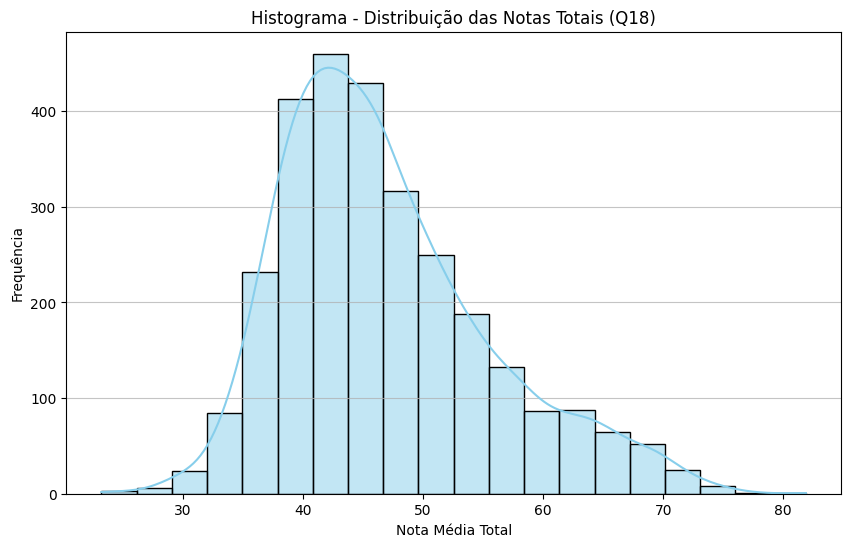

In [22]:
# Célula 19 - Histograma da distribuição das notas totais

import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que Q18 seja numérica
df_analise['Q18'] = pd.to_numeric(df_analise['Q18'], errors='coerce')

# Plotar histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_analise['Q18'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Histograma - Distribuição das Notas Totais (Q18)')
plt.xlabel('Nota Média Total')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

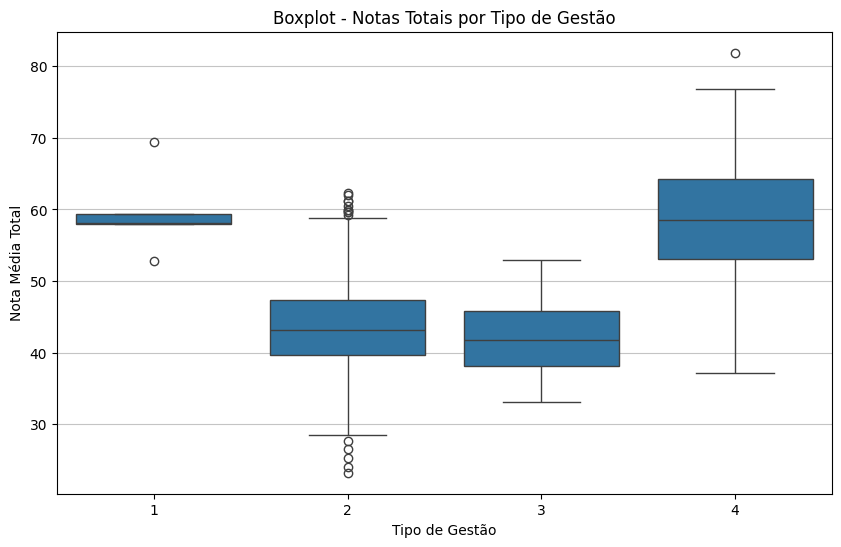

In [23]:
# Célula 20 - Boxplot das notas totais por tipo de gestão (Q8)

import seaborn as sns

# Converter Q8 para categórico
df_analise['Q8'] = df_analise['Q8'].astype('category')

# Plotar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Q8', y='Q18', data=df_analise)
plt.title('Boxplot - Notas Totais por Tipo de Gestão')
plt.xlabel('Tipo de Gestão')
plt.ylabel('Nota Média Total')
plt.grid(axis='y', alpha=0.75)
plt.show()

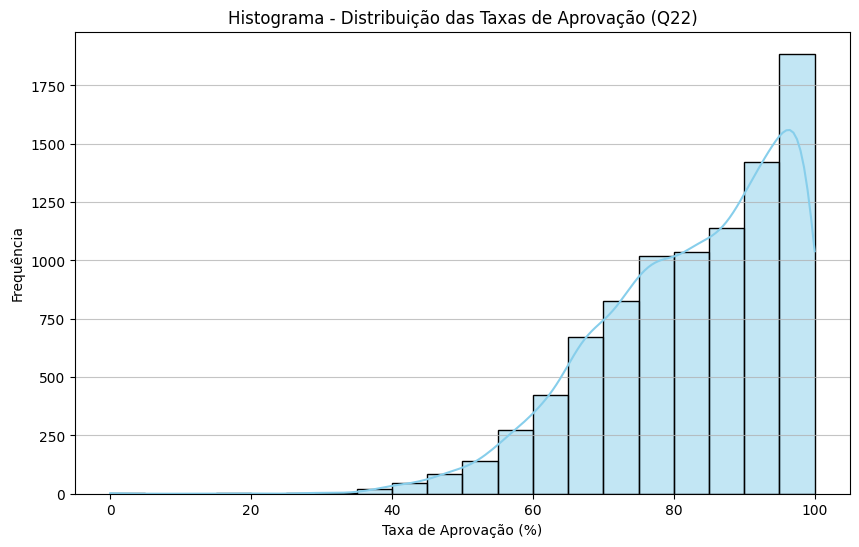

In [24]:
# Célula 21 - Histograma da distribuição das taxas de aprovação (Q22)

import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que Q22 seja numérica
df_analise['Q22'] = pd.to_numeric(df_analise['Q22'], errors='coerce')

# Plotar histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_analise['Q22'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Histograma - Distribuição das Taxas de Aprovação (Q22)')
plt.xlabel('Taxa de Aprovação (%)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

🧾 Quantidade de valores nulos em Q23: 1005


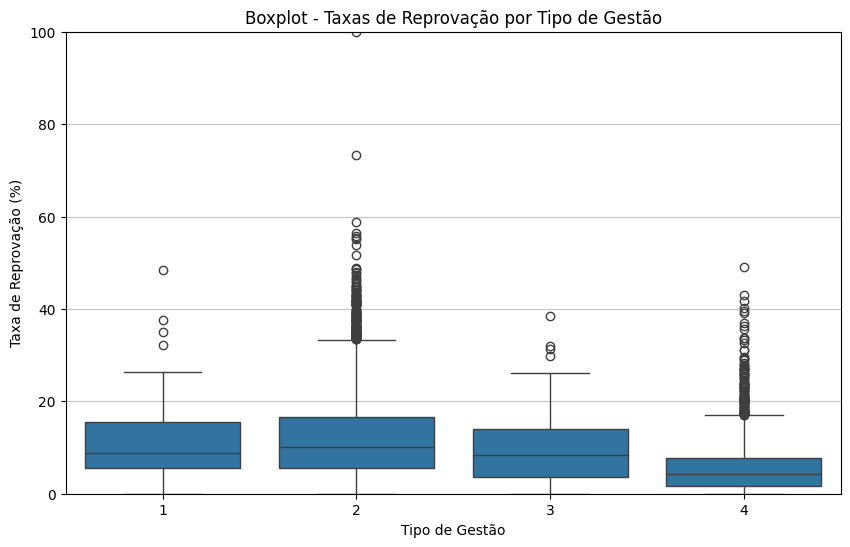

In [27]:
# Célula 22 - Corrigir conversão de Q23 para numérico antes do boxplot

# Garantir que Q23 seja numérica, tratando os valores ausentes como NaN
df_analise['Q23'] = pd.to_numeric(df_analise['Q23'].str.replace(',', '.'), errors='coerce')

# Verificar se há valores nulos
print("🧾 Quantidade de valores nulos em Q23:", df_analise['Q23'].isnull().sum())

# Plotar boxplot apenas com dados válidos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Q8', y='Q23', data=df_analise)
plt.title('Boxplot - Taxas de Reprovação por Tipo de Gestão')
plt.xlabel('Tipo de Gestão')
plt.ylabel('Taxa de Reprovação (%)')
plt.grid(axis='y', alpha=0.75)

# Limitar escala para evitar outliers extremos
plt.ylim(0, 100)
plt.show()

🧾 Primeiras linhas de Q24 após conversão:
    Q24
0   0.7
1   0.0
2  20.4
3  15.7
4   4.8
5   0.0
6  14.0
7  10.5
8   7.0
9  15.2


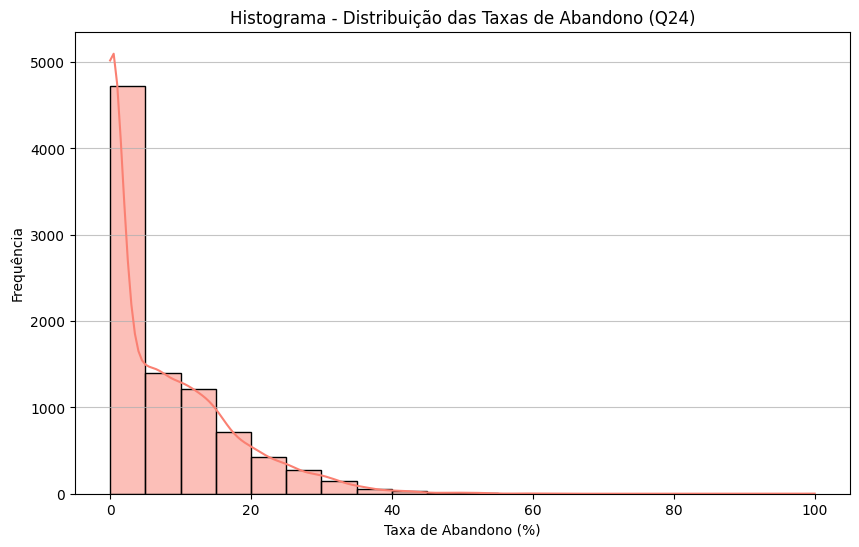

In [29]:
# Célula 23 - Histograma da distribuição das taxas de abandono (Q24)

import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que Q24 seja numérica
df_analise['Q24'] = pd.to_numeric(df_analise['Q24'].str.replace(',', '.'), errors='coerce')

print("🧾 Primeiras linhas de Q24 após conversão:")
print(df_analise[['Q24']].head(10))

# Plotar histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_analise['Q24'], bins=20, kde=True, color='salmon', edgecolor='black')
plt.title('Histograma - Distribuição das Taxas de Abandono (Q24)')
plt.xlabel('Taxa de Abandono (%)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [30]:
# Célula 29 - Tabela cruzada entre porte da escola (Q10) e localização (Q9)

# Converter Q10 e Q9 para categórico
df_analise['Q10'] = df_analise['Q10'].astype('category')
df_analise['Q9'] = df_analise['Q9'].astype('category')

# Criar tabela cruzada
tabela_cruzada = pd.crosstab(df_analise['Q10'], df_analise['Q9'])

print("\n📊 Tabela Cruzada entre Porte da Escola (Q10) e Localização (Q9):")
print(tabela_cruzada)


📊 Tabela Cruzada entre Porte da Escola (Q10) e Localização (Q9):
Q9                      1    2
Q10                           
De 1 a 30 alunos     1771  106
De 31 a 60 alunos    2188  131
De 61 a 90 alunos    1618   46
Maior que 90 alunos  4081   59


<ipython-input-31-3035388116>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estruturado['Q10'] = df_estruturado['Q10'].astype(str)
<ipython-input-31-3035388116>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_estruturado['Q9'] = df_estruturado['Q9'].astype(int).astype(str)


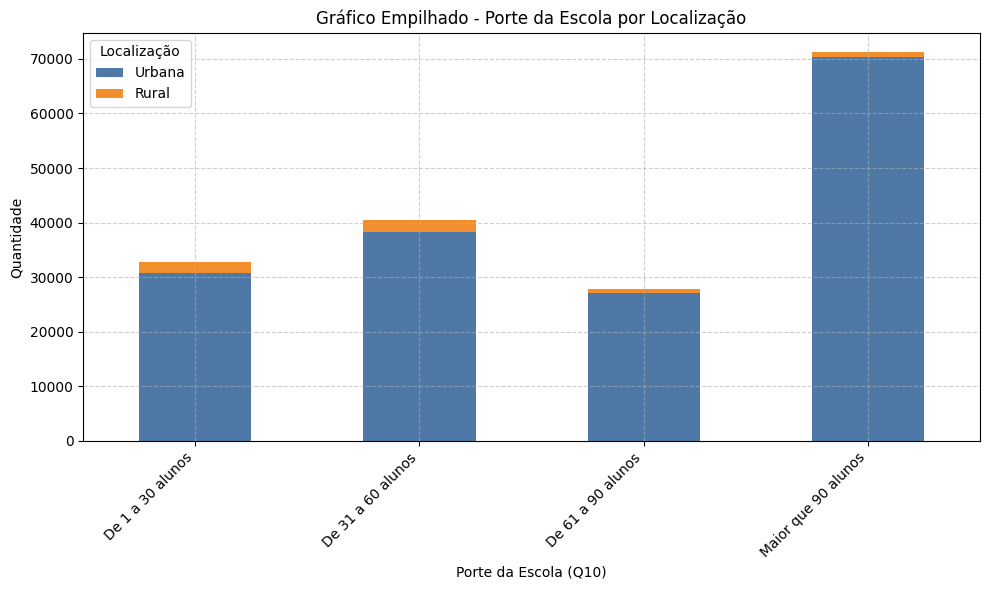

In [31]:
# Célula 30 - Gráfico de barras empilhadas entre Q10 (porte) e Q9 (localização)

import matplotlib.pyplot as plt

# Garantir que Q10 e Q9 estejam como categoria
df_estruturado['Q10'] = df_estruturado['Q10'].astype(str)
df_estruturado['Q9'] = df_estruturado['Q9'].astype(int).astype(str)

# Criar tabela cruzada
tabela_cruzada = pd.crosstab(df_estruturado['Q10'], df_estruturado['Q9'])

# Renomear colunas para legibilidade
tabela_cruzada.columns = ['Urbana', 'Rural']

# Plotar gráfico de barras empilhadas
tabela_cruzada.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#4E79A7', '#F28E2B'])
plt.title('Gráfico Empilhado - Porte da Escola por Localização')
plt.xlabel('Porte da Escola (Q10)')
plt.ylabel('Quantidade')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Localização')
plt.show()

In [32]:
# Célula 31 - Corrigir SettingWithCopyWarning

# Converter Q10 para string usando .loc[]
df_estruturado.loc[:, 'Q10'] = df_estruturado['Q10'].astype(str)

# Converter Q9 para string usando .loc[]
df_estruturado.loc[:, 'Q9'] = df_estruturado['Q9'].astype(int).astype(str)

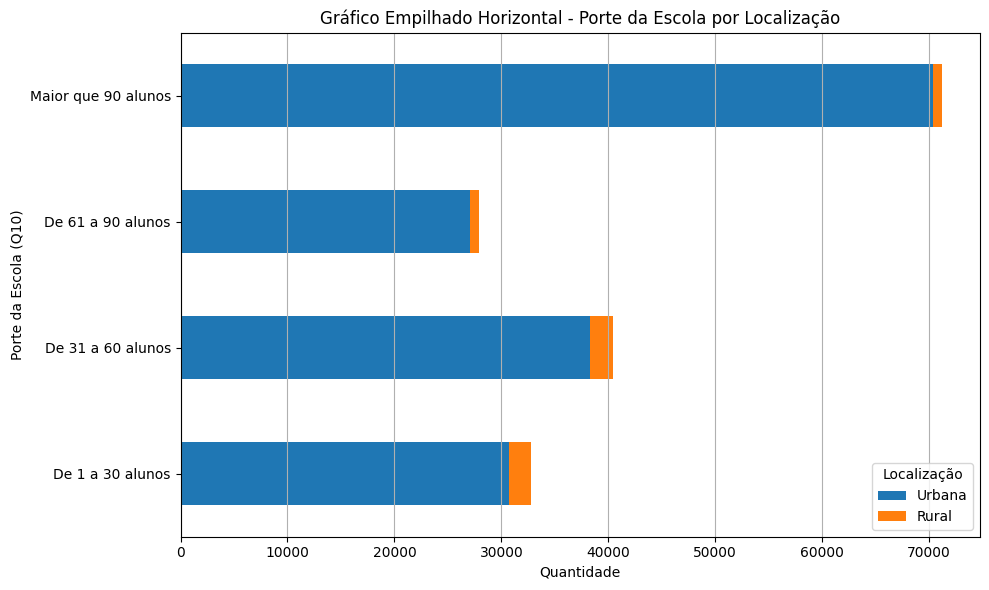

In [33]:
# Célula 32 - Gráfico Empilhado Horizontal - Porte da Escola por Localização

import matplotlib.pyplot as plt

# Criar tabela cruzada (tabela de contingência) para porte da escola e localização
tab_contingencia = pd.crosstab(df_estruturado['Q10'], df_estruturado['Q9'])

# Plotar gráfico empilhado horizontal
tab_contingencia.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Gráfico Empilhado Horizontal - Porte da Escola por Localização')
plt.xlabel('Quantidade')
plt.ylabel('Porte da Escola (Q10)')
plt.legend(title='Localização', labels=['Urbana', 'Rural'])
plt.grid(axis='x')  # Adicionar grade horizontal
plt.tight_layout()
plt.show()

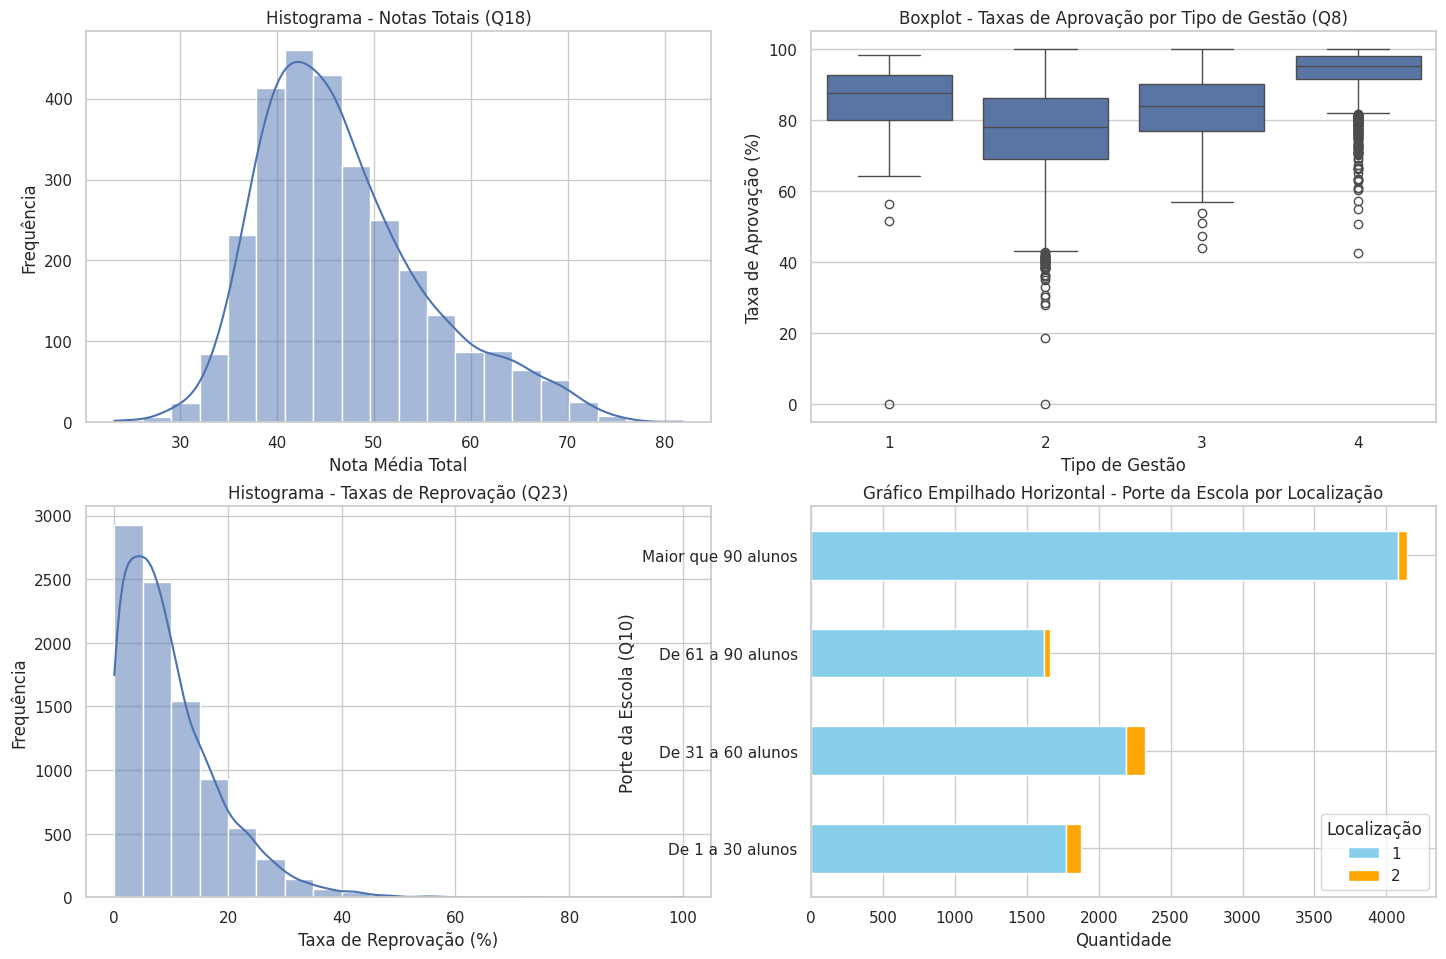

In [34]:
# Célula 33 - Montar relatório técnico

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo dos gráficos
sns.set(style="whitegrid")

# Criar figuras principais
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.tight_layout(pad=3)

# Histograma das notas totais (Q18)
sns.histplot(df_analise['Q18'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histograma - Notas Totais (Q18)')
axes[0, 0].set_xlabel('Nota Média Total')
axes[0, 0].set_ylabel('Frequência')

# Boxplot das taxas de aprovação por tipo de gestão (Q8)
sns.boxplot(x='Q8', y='Q22', data=df_analise, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot - Taxas de Aprovação por Tipo de Gestão (Q8)')
axes[0, 1].set_xlabel('Tipo de Gestão')
axes[0, 1].set_ylabel('Taxa de Aprovação (%)')

# Histograma das taxas de reprovação (Q23)
sns.histplot(df_analise['Q23'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histograma - Taxas de Reprovação (Q23)')
axes[1, 0].set_xlabel('Taxa de Reprovação (%)')
axes[1, 0].set_ylabel('Frequência')

# Gráfico empilhado horizontal de porte da escola por localização
tabela_cruzada = pd.crosstab(df_analise['Q10'], df_analise['Q9'])
tabela_cruzada.plot(kind='barh', stacked=True, ax=axes[1, 1], color=['skyblue', 'orange'])
axes[1, 1].set_title('Gráfico Empilhado Horizontal - Porte da Escola por Localização')
axes[1, 1].set_xlabel('Quantidade')
axes[1, 1].set_ylabel('Porte da Escola (Q10)')
axes[1, 1].legend(title='Localização')

# Mostrar todas as figuras
plt.show()

In [35]:
# Célula 34 - Relatório Técnico por Tipo de Gestão (Q8)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar novamente os dados estruturados para análise
worksheet_estruturado = sh.worksheet("Dados_Estruturados")
dados_estruturados = worksheet_estruturado.get_all_values()
df_relatorio = pd.DataFrame(dados_estruturados[1:], columns=dados_estruturados[0])

# Converter colunas numéricas para tipos corretos
df_relatorio['Q18'] = pd.to_numeric(df_relatorio['Q18'].str.replace(',', '.'), errors='coerce')
df_relatorio['Q22'] = pd.to_numeric(df_relatorio['Q22'].str.replace(',', '.'), errors='coerce')
df_relatorio['Q23'] = pd.to_numeric(df_relatorio['Q23'].str.replace(',', '.'), errors='coerce')
df_relatorio['Q24'] = pd.to_numeric(df_relatorio['Q24'].str.replace(',', '.'), errors='coerce')

print("📌 Primeiras linhas carregadas:")
print(df_relatorio[['ID', 'Q8', 'Q18', 'Q22', 'Q23', 'Q24']].head())

# Mostrar médias por Q8
print("\n📊 Médias por Tipo de Gestão (Q8):")
print(df_relatorio.groupby('Q8')[['Q18', 'Q22', 'Q23', 'Q24']].mean().round(2))

# Plotar boxplot das notas totais por Q8
plt.figure(figsize=(10, 6))
sns.boxplot(x='Q8', y='Q18', data=df_relatorio)
plt.title('Boxplot - Notas Totais por Tipo de Gestão (Q8)')
plt.xlabel('Tipo de Gestão')
plt.ylabel('Nota Média Total')
plt.grid(True)
plt.show()

APIError: APIError: [503]: The service is currently unavailable.